### IMPORTING LIBRARIES

In [105]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifierCV

###  LOADING IRIS TRAINING DATA

In [106]:
data = pd.read_csv(r'C:\Users\trymo\Downloads\Iris_data.csv')

In [107]:
data.head(5)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [6]:
data.tail(5)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
96,145,6.7,3.3,5.7,2.5,2
97,146,6.7,3.0,5.2,2.3,2
98,147,6.3,2.5,5.0,1.9,2
99,149,6.2,3.4,5.4,2.3,2
100,150,5.9,3.0,5.1,1.8,2


In [8]:
data.shape

(101, 6)

### CHECKING FOR MISSING VALUES

In [5]:
data.isnull().sum()

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

### DATA TYPES

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    101 non-null    int64  
 1   Sepal.Length  101 non-null    float64
 2   Sepal.Width   101 non-null    float64
 3   Petal.Length  101 non-null    float64
 4   Petal.Width   101 non-null    float64
 5   Species       101 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 4.9 KB


### ATTRIBUTES ,LABEL & MINOR ANALYSIS

In [7]:
data.columns

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,101.0,75.316832,44.188897,1.0,39.0,75.0,116.0,150.0
Sepal.Length,101.0,5.749505,0.795566,4.4,5.1,5.7,6.3,7.9
Sepal.Width,101.0,3.061386,0.451878,2.0,2.8,3.0,3.4,4.4
Petal.Length,101.0,3.654455,1.741294,1.0,1.5,4.2,5.0,6.9
Petal.Width,101.0,1.167327,0.748346,0.1,0.3,1.3,1.8,2.5
Species,101.0,0.970297,0.805673,0.0,0.0,1.0,2.0,2.0


### VISUALISATIONS

array([[<AxesSubplot:title={'center':'Sepal.Length'}>]], dtype=object)

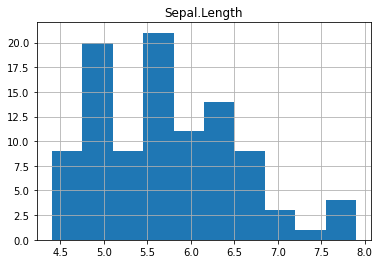

In [75]:
data.hist('Sepal.Length')


array([[<AxesSubplot:title={'center':'Sepal.Width'}>]], dtype=object)

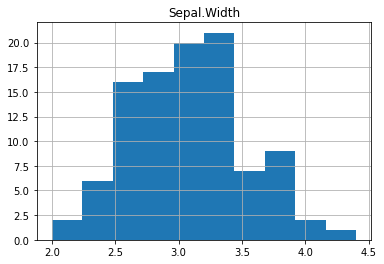

In [10]:
data.hist('Sepal.Width')

array([[<AxesSubplot:title={'center':'Petal.Length'}>]], dtype=object)

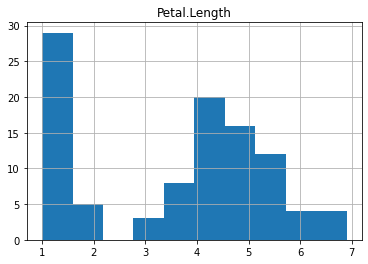

In [20]:
data.hist('Petal.Length')

array([[<AxesSubplot:title={'center':'Petal.Width'}>]], dtype=object)

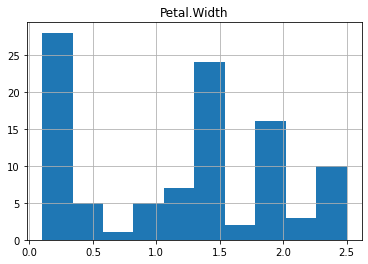

In [21]:
data.hist('Petal.Width')

<AxesSubplot:xlabel='Petal.Width', ylabel='Petal.Length'>

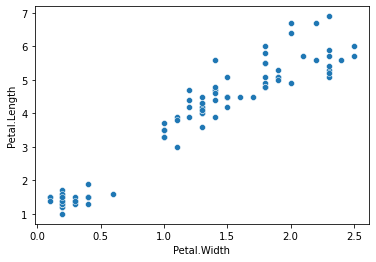

In [13]:
sns.scatterplot(y='Petal.Length',x='Petal.Width',data=data,palette='')

<AxesSubplot:xlabel='Sepal.Width', ylabel='Sepal.Length'>

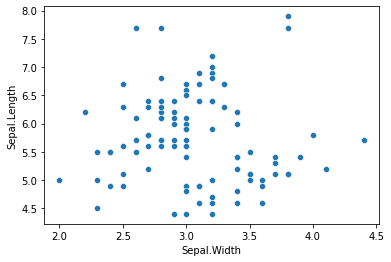

In [12]:
sns.scatterplot(y='Sepal.Length',x='Sepal.Width',data=data,palette='')

<AxesSubplot:xlabel='Petal.Width', ylabel='Sepal.Length'>

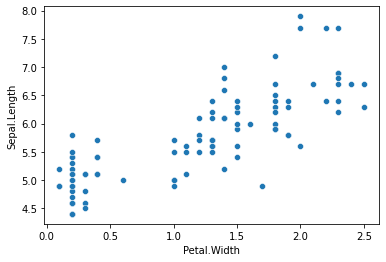

In [20]:
sns.scatterplot(y='Sepal.Length',x='Petal.Width',data=data,palette='')

<AxesSubplot:xlabel='Sepal.Width', ylabel='Petal.Length'>

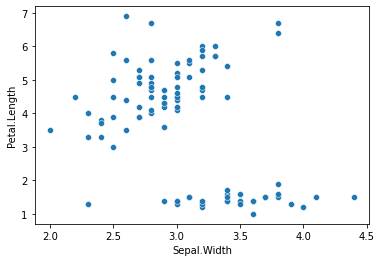

In [22]:
sns.scatterplot(y='Petal.Length',x='Sepal.Width',data=data,palette='')

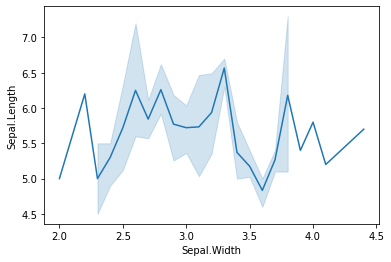

In [37]:
sns.lineplot(x ='Sepal.Width', y = 'Sepal.Length',data=data)
plt.show()

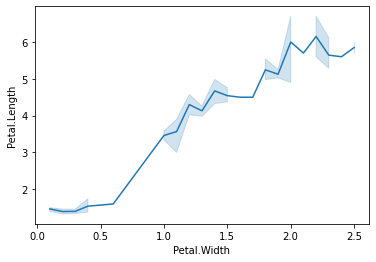

In [71]:
sns.lineplot(x ='Petal.Width', y = 'Petal.Length',data=data)
plt.show()

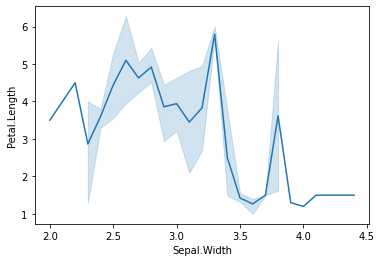

In [76]:
sns.lineplot(x ='Sepal.Width', y = 'Petal.Length',data=data)
plt.show()

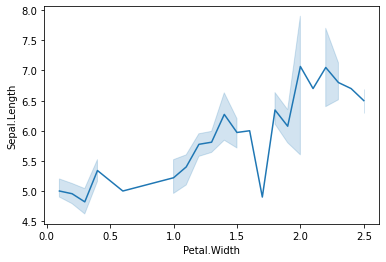

In [77]:
sns.lineplot(x ='Petal.Width', y = 'Sepal.Length',data=data)
plt.show()

In [53]:
d1 = data.drop(['Unnamed: 0','Species'],axis=1)
d1.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
corrmatrix = d1.corr().round(2)
print(corrmatrix)

              Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length          1.00        -0.06          0.85         0.81
Sepal.Width          -0.06         1.00         -0.41        -0.36
Petal.Length          0.85        -0.41          1.00         0.96
Petal.Width           0.81        -0.36          0.96         1.00


In [68]:
#matrix = data.corr().round(2)
#sns.heatmap(matrix, annot=True)
#plt.show()

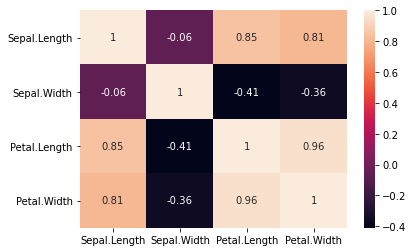

In [55]:
matrix = d1.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

<AxesSubplot:>

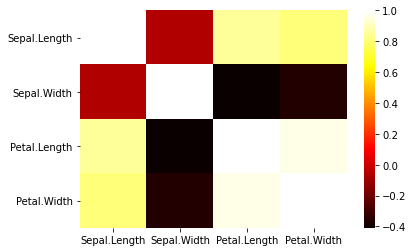

In [69]:
sns.heatmap(d1.corr(),cmap='hot')

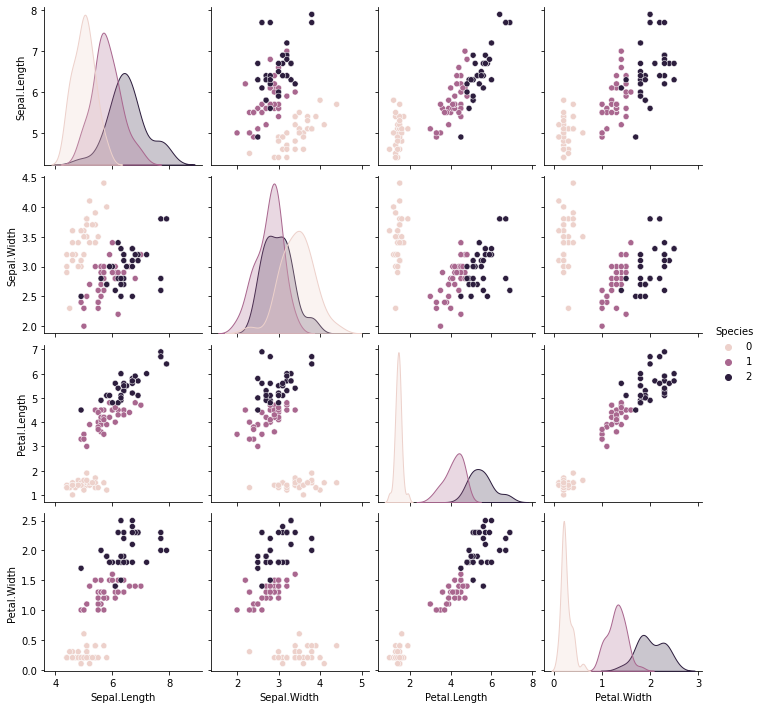

In [60]:
sns.pairplot(vars=[ 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width'],data=data,hue='Species')

In [111]:
x = data.iloc[:, 1:5]
y = data.Species

### DEVELOPING THE MODEL

In [80]:
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:101], X[101:]
y_train, y_test = y[:101], y[101:]

In [98]:
 data = GradientBoostingClassifier(n_estimators=100, learning_rate=1,
     max_depth=1, random_state=0).fit(X_train, y_train)
data.score(X_test, y_test).round(2)

0.7

In [99]:
data = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X, y)
data.score(X, y).round(2)


0.55

In [113]:
irismodel.fit(x, y)

GaussianNB()

In [114]:
accuracy=irismodel.score(x,y)
round(accuracy*100,2)

97.03

###  FITING THE MODEL

In [115]:
irismodel.fit(x, y)

GaussianNB()

###  CHECKING MODEL ACCURACY

In [116]:
accuracy=irismodel.score(x,y)
round(accuracy*100,2)

97.03

###  PREDICTED VALUES

In [117]:
pred = irismodel.predict(x)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

### ACTUAL VS PREDICTED

In [118]:
crosst =pd.crosstab(y, pred)
crosst

col_0,0,1,2
Species,,,
0,34,0,0
1,0,35,1
2,0,2,29


### IMPORTING TEST DATA

In [119]:
testdata = pd.read_csv(r"C:\Users\trymo\Downloads\Iris_test.csv")
testdata.head(3)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6,5.4,3.9,1.7,0.4,0
1,8,5.0,3.4,1.5,0.2,0
2,13,4.8,3.0,1.4,0.1,0


In [17]:
testdata.tail(3)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
46,137,6.3,3.4,5.6,2.4,2
47,140,6.9,3.1,5.4,2.1,2
48,148,6.5,3.0,5.2,2.0,2


In [120]:
testx = testdata.iloc[:, 1:5]
testy = testdata.Species

### PREDICTING USING TEST VALUES

In [121]:
predtest = irismodel.predict(testx)
predtest

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2], dtype=int64)

### CHECKING ACCURACY OF THE MODEL

In [122]:
accuracyt=irismodel.score(testx,testy)
round(accuracyt*100,3)

89.796

### ACTUAL VS PREDICTED(CONFUSION MATRIX)

In [123]:
mytest =pd.crosstab(testy, predtest)
mytest

col_0,0,1,2
Species,,,
0,16,0,0
1,0,10,4
2,0,1,18


In [124]:
math = confusion_matrix(testy,predtest)
math

array([[16,  0,  0],
       [ 0, 10,  4],
       [ 0,  1, 18]], dtype=int64)

### VISUALISING CONFUSION MATRIX

<function matplotlib.pyplot.show(close=None, block=None)>

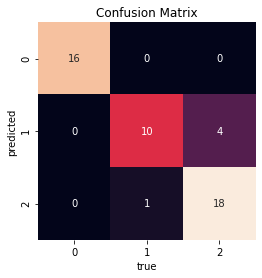

In [125]:
sns.heatmap(math, square=True, annot=True,cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('true')
plt.ylabel('predicted')
plt.show

### FINAL REPORT 

In [126]:
report = classification_report(testy, predtest)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.71      0.80        14
           2       0.82      0.95      0.88        19

    accuracy                           0.90        49
   macro avg       0.91      0.89      0.89        49
weighted avg       0.90      0.90      0.90        49



# END!

# BY T. NCUBE